# Launch Turi Create

In [4]:
import turicreate

# Load house sales data

In [7]:
sales = turicreate.SFrame('data/home_data.sframe/')

In [6]:
sales

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000.0 |   4.0    |    4.5    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500.0 |   3.0    |    2.25   |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850.0 |   3.0    |    1.5    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500.0 |   3.0    |    1.0    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000.0 |   3.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    5420.0   | 101930.0 |  1.0   |     0      |  0   |     3     |  11.0 |
|    1715.0   |  6819.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1060.0   |  9711.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1780.0   |  7470.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1890.0   |  6560.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
|   3890.0   |     1530.0    |  2001.0  |     0.0      |  98053  | 47.65611835 |
|   1715.0   |      0.0      |  1995.0  |     0.0      |  98003  | 47.30972002 |
|   1060.0   |      0.0      |  1963.0  |     0.0      |  98198  | 47.40949984 |
|   1050.0   |     730.0     |  1960.0  |     0.0      |  98146  | 47.51229381 |
|   1890.0   |      0.0      |  2003.0  |     0.0      |  98038  | 47.36840673 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
| -122.00528655 |     4760.0    | ... |

# Explore

In [8]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [9]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [10]:
#making training set and test set
training_set, test_set = sales.random_split(.8,seed=0)

In [11]:
training_set

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000.0 |   4.0    |    4.5    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500.0 |   3.0    |    2.25   |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850.0 |   3.0    |    1.5    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500.0 |   3.0    |    1.0    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000.0 |   3.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    5420.0   | 101930.0 |  1.0   |     0      |  0   |     3     |  11.0 |
|    1715.0   |  6819.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1060.0   |  9711.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1780.0   |  7470.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1890.0   |  6560.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
|   3890.0   |     1530.0    |  2001.0  |     0.0      |  98053  | 47.65611835 |
|   1715.0   |      0.0      |  1995.0  |     0.0      |  98003  | 47.30972002 |
|   1060.0   |      0.0      |  1963.0  |     0.0      |  98198  | 47.40949984 |
|   1050.0   |     730.0     |  1960.0  |     0.0      |  98146  | 47.51229381 |
|   1890.0   |      0.0      |  2003.0  |     0.0      |  98038  | 47.36840673 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
| -122.00528655 |     4760.0    | ...

In [13]:
test_set

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000.0 |   3.0    |    1.0    |
| 9297300055 | 2015-01-24 00:00:00+00:00 | 650000.0 |   4.0    |    3.0    |
| 1202000200 | 2014-11-03 00:00:00+00:00 | 233000.0 |   3.0    |    2.0    |
| 8562750320 | 2014-11-10 00:00:00+00:00 | 580500.0 |   3.0    |    2.5    |
| 7589200193 | 2014-11-10 00:00:00+00:00 | 535000.0 |   3.0    |    1.0    |
| 2078500320 | 2014-06-20 00:00:00+00:00 | 605000.0 |   4.0    |    2.5    |
| 7766200013 | 2014-08-11 00:00:00+00:00 | 775000.0 |   4.0    |    2.25   |
| 9478500640 | 2014-08-19 00:00:00+00:00 | 292500.0 |   4.0    |    2.5    |
| 9558200045 | 2014-08-28 00:00:00+00:00 | 289000.0 |   3.0    |    1.75   |
| 8820901275 | 2014-06-10 00:00:00+00:00 | 571000.0 |   4.0    |    2.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1430.0   | 19901.0  |  1.5   |     0      |  0   |     4     |  7.0  |
|    2950.0   |  5000.0  |  2.0   |     0      |  3   |     3     |  9.0  |
|    1710.0   |  4697.0  |  1.5   |     0      |  0   |     5     |  6.0  |
|    2320.0   |  3980.0  |  2.0   |     0      |  0   |     3     |  8.0  |
|    1090.0   |  3000.0  |  1.5   |     0      |  0   |     4     |  8.0  |
|    2620.0   |  7553.0  |  2.0   |     0      |  0   |     3     |  8.0  |
|    4220.0   | 24186.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    2250.0   |  4495.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1260.0   |  8400.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2750.0   |  7807.0  |  1.5   |     0      |  0   |     5     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1430.0   |      0.0      |  1927.0  |     0.0      |  98028  | 47.75584254 |
|   1980.0   |     970.0     |  1979.0  |     0.0      |  98126  | 47.57136955 |
|   1710.0   |      0.0      |  1941.0  |     0.0      |  98002  | 47.30482931 |
|   2320.0   |      0.0      |  2003.0  |     0.0      |  98027  |  47.5391103 |
|   1090.0   |      0.0      |  1929.0  |     0.0      |  98117  | 47.68889559 |
|   2620.0   |      0.0      |  1996.0  |     0.0      |  98056  | 47.53013988 |
|   2600.0   |     1620.0    |  1984.0  |     0.0      |  98166  | 47.44504345 |
|   2250.0   |      0.0      |  2008.0  |     0.0      |  98042  | 47.36628767 |
|   1260.0   |      0.0      |  1954.0  |     0.0      |  98148  | 47.43658598 |
|   2250.0   |     500.0     |  1916.0  |     0.0      |  98125  |  47.7168015 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.22874498 |     1780.0    | ... |
| -122.37541218 |     2140.0    | ... |
| -122.21774909 |     1030.0    | ... |
| -122.06971484 |     2580.0    | ... |
|  -122.3752359 |     1570.0    | ... |
| -122.18000831 |     2620.0    | ... |
| -122.3472

## train simple regression model

In [16]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.009163     | 4355552.141470     | 2043380.011512       | 262166.856682                   | 277294.644846                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [17]:
print (test_set['price'].mean())

543054.0425632538


In [18]:
print (sqft_model.evaluate(test_set))

{'max_error': 4148388.3283447544, 'rmse': 255187.56842205045}


# Explore model a little further

In [19]:
sqft_model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None | -46490.1284319195  | 5045.022591618539  |
| sqft_living |  None | 281.40564207150305 | 2.2168032833720193 |
+-------------+-------+--------------------+--------------------+
[2 rows x 4 columns]

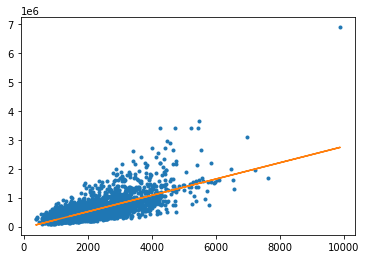

In [21]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [22]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [23]:
sales[my_features].show()

Materializing SFrame

In [24]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [15]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16444

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 1        | 0.007891     | 7700000.000000     | 7062500.000000       | 650016.633841                   | 718380.463959                     |

| 1         | 2        | 0.027284     | 2593380.273428     | 3836105.704401       | 178988.181761                   | 230674.842228                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [33]:
print (my_features)

NameError: name 'my_features' is not defined

In [17]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4136882.6348793716, 'rmse': 255209.21881082928}
{'max_error': 3539726.837428363, 'rmse': 179363.49443647868}


# Apply learned models to make predictions

In [18]:
house1 = sales[sales['id']=='5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [20]:
print (house1['price'])

[620000, ... ]


In [22]:
print (sqft_model.predict(house1))

[629976.0401234042]


In [23]:
print (my_features_model.predict(house1))

[724495.9972504767]


## Prediction for a second house, a fancier one

In [24]:
house2 = sales[sales['id']=='1925069082']

In [25]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print (sqft_model.predict(house2))

[1263438.8662907984]


In [27]:
print (my_features_model.predict(house2))

[1442070.3235753486]


## Prediction for a super fancy home

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [29]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[13491984.465966508]
